In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline     
import seaborn as sns
sns.set(color_codes=True)


from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('./patient_data.csv')
df.head(5)

,Date,Minimum Air Temperature,Maximum Air Temperature,Relative Humidity (%),Rainfall (mm),Weekday,Weekend,Holiday,Day after holiday,No. of A&E first attendances,total adult patient,Total children patient
0,1/12/2019,17.80,28.05,64,0.0,0,1,1,0,713,3255,256
1,2/12/2019,14.25,20.40,45,0.0,1,0,0,1,797,3269,279
2,3/12/2019,12.75,20.15,34,0.0,1,0,0,0,752,3136,286
3,4/12/2019,13.30,21.45,27,0.0,1,0,0,0,766,3118,265
4,5/12/2019,12.20,17.90,43,1.2,1,0,0,0,782,3104,264


In [3]:
col = ['Minimum Air Temperature','Maximum Air Temperature','Relative Humidity (%)', 'Rainfall (mm)', 'Weekday', 'Weekend', 'Holiday', 'Day after holiday']
X = df[col] 
X.head()

,Minimum Air Temperature,Maximum Air Temperature,Relative Humidity (%),Rainfall (mm),Weekday,Weekend,Holiday,Day after holiday
0,17.80,28.05,64,0.0,0,1,1,0
1,14.25,20.40,45,0.0,1,0,0,1
2,12.75,20.15,34,0.0,1,0,0,0
3,13.30,21.45,27,0.0,1,0,0,0
4,12.20,17.90,43,1.2,1,0,0,0


In [4]:
y_total = df['No. of A&E first attendances']
y_adult = df['total adult patient']
y_children = df['Total children patient']

# This is the Lasso of total patient 

In [5]:
X_train, X_test, y_total_train, y_total_test = train_test_split(X, y_total, test_size=0.2, random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler
list_X = X.columns

scaler = StandardScaler().fit(X_train[list_X]) 

X_train[list_X] = scaler.transform(X_train[list_X])

X_test[list_X] = scaler.transform(X_test[list_X])

SX=X.copy()
SX[list_X] = scaler.transform(SX[list_X])


LSO_total = Lasso(alpha=0.001).fit(X_train,y_total_train)

coeff_parameter = pd.DataFrame(LSO_total.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Minimum Air Temperature,-11.518582
Maximum Air Temperature,2.536690
Relative Humidity (%),8.059059
Rainfall (mm),-17.192484
Weekday,20.427681
Weekend,1.823543
Holiday,-8.143933
Day after holiday,13.903620


In [7]:
predicted_trained_total_patient = LSO_total.predict(X_train)
predicted_test_total_patient = LSO_total.predict(X_test)

predicted_total_patient = LSO_total.predict(SX)
df_predicted_total_patient = pd.DataFrame(predicted_total_patient,index=y_total.index,columns = ['predicted_total_patient'])  
df_predicted_total_patient

,predicted_total_patient
0,585.290516
1,679.546852
2,639.185996
3,634.594224
4,640.428189
...,...
478,650.706342
479,606.209811
480,590.149175
481,690.599990


In [8]:
trr= LSO_total.score(X_train, y_total_train)
ter= LSO_total.score(X_test, y_total_test)

In [9]:
trerror = mean_squared_error(predicted_trained_total_patient, y_total_train)
teerror = mean_squared_error(predicted_test_total_patient, y_total_test)

print('MSE train: %.2f, test: %.2f' % (trerror,teerror))
print('R^2 train: %.2f, test: %.2f' % (trr,ter))



MSE train: 11769.33, test: 8743.51
R^2 train: 0.09, test: 0.13


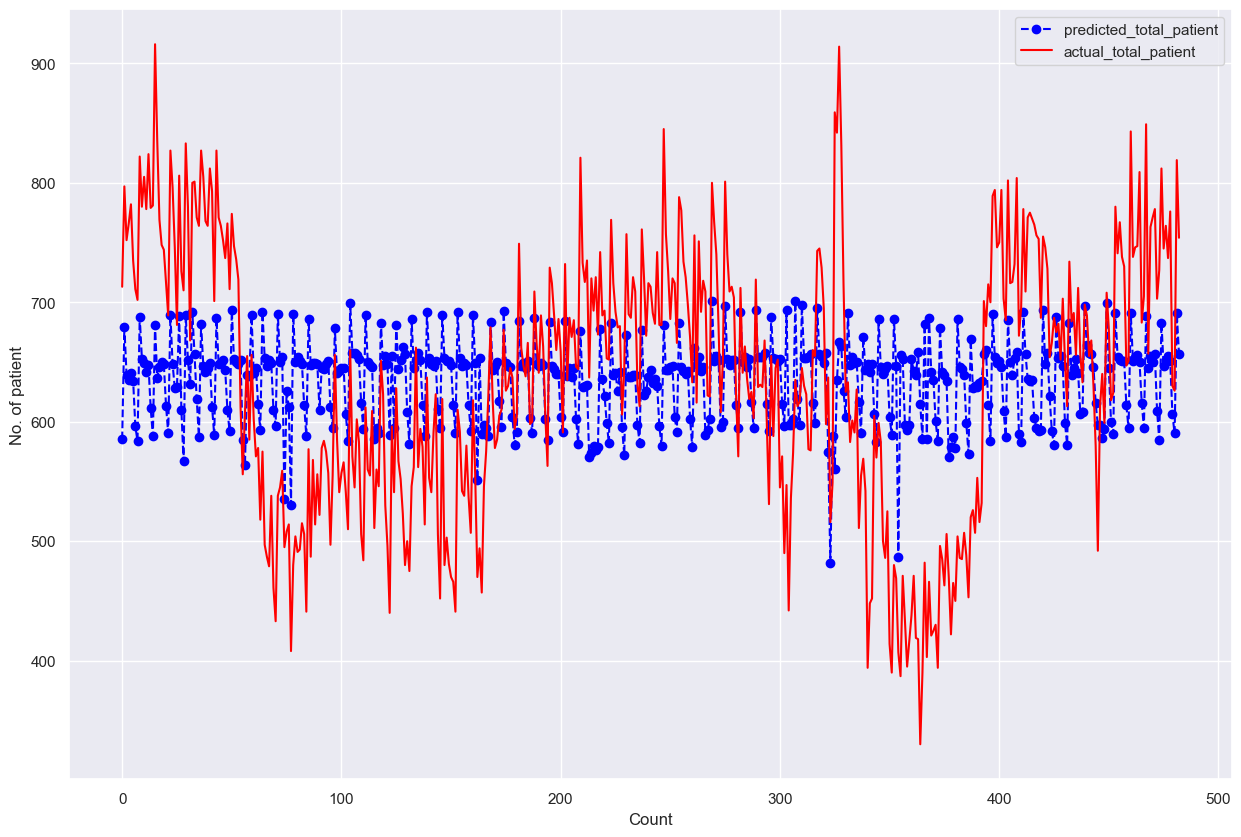

In [10]:
df_predicted_total_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_total.plot(color='red')

plt.legend(['predicted_total_patient','actual_total_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [11]:
new_df = pd.DataFrame()
new_df['actual_total_patient'] = list(y_total)
new_df['predicted_total_patient'] = predicted_total_patient
new_df.head()

,actual_total_patient,predicted_total_patient
0,713,585.290516
1,797,679.546852
2,752,639.185996
3,766,634.594224
4,782,640.428189


In [12]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_total_train,X_train_Sm).fit()
print(ls.summary())

                                 OLS Regression Results                                 
Dep. Variable:     No. of A&E first attendances   R-squared:                       0.093
Model:                                      OLS   Adj. R-squared:                  0.074
Method:                           Least Squares   F-statistic:                     4.833
Date:                          Fri, 05 May 2023   Prob (F-statistic):           1.10e-05
Time:                                  02:38:50   Log-Likelihood:                -2356.7
No. Observations:                           386   AIC:                             4731.
Df Residuals:                               377   BIC:                             4767.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

# Below is the LASSO of adult patient

In [13]:
X_train, X_test, y_adult_train, y_adult_test = train_test_split(X, y_adult, test_size=0.2, random_state=101)

In [14]:
list_X = X.columns

scaler = StandardScaler().fit(X_train[list_X]) 

X_train[list_X] = scaler.transform(X_train[list_X])

X_test[list_X] = scaler.transform(X_test[list_X])

SX=X.copy()
SX[list_X] = scaler.transform(SX[list_X])

LSO_adult = Lasso(alpha=0.001).fit(X_train,y_adult_train)

coeff_parameter = pd.DataFrame(LSO_adult.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Minimum Air Temperature,7.169355
Maximum Air Temperature,11.711252
Relative Humidity (%),-20.212949
Rainfall (mm),-32.960203
Weekday,79.069498
Weekend,53.247568
Holiday,25.104086
Day after holiday,9.382875


In [15]:
predicted_trained_adult_patient = LSO_adult.predict(X_train)
predicted_test_adult_patient = LSO_adult.predict(X_test)


predicted_adult_patient = LSO_adult.predict(SX)
df_predicted_adult_patient = pd.DataFrame(predicted_adult_patient,index=y_adult.index,columns = ['predicted_adult_patient'])  
df_predicted_adult_patient

,predicted_adult_patient
0,2824.993757
1,2836.402341
2,2820.750103
3,2835.002562
4,2793.742505
...,...
478,2801.090651
479,2748.839993
480,2807.658238
481,2816.102494


In [16]:
trr= LSO_adult.score(X_train, y_adult_train)
ter= LSO_adult.score(X_test, y_adult_test)

In [17]:
trerror = mean_squared_error(predicted_trained_adult_patient, y_adult_train)
teerror = mean_squared_error(predicted_test_adult_patient, y_adult_test)

print('MSE train: %.2f, test: %.2f' % (trerror,teerror))
print('R^2 train: %.2f, test: %.2f' % (trr,ter))



MSE train: 69148.92, test: 81449.34
R^2 train: 0.04, test: 0.09


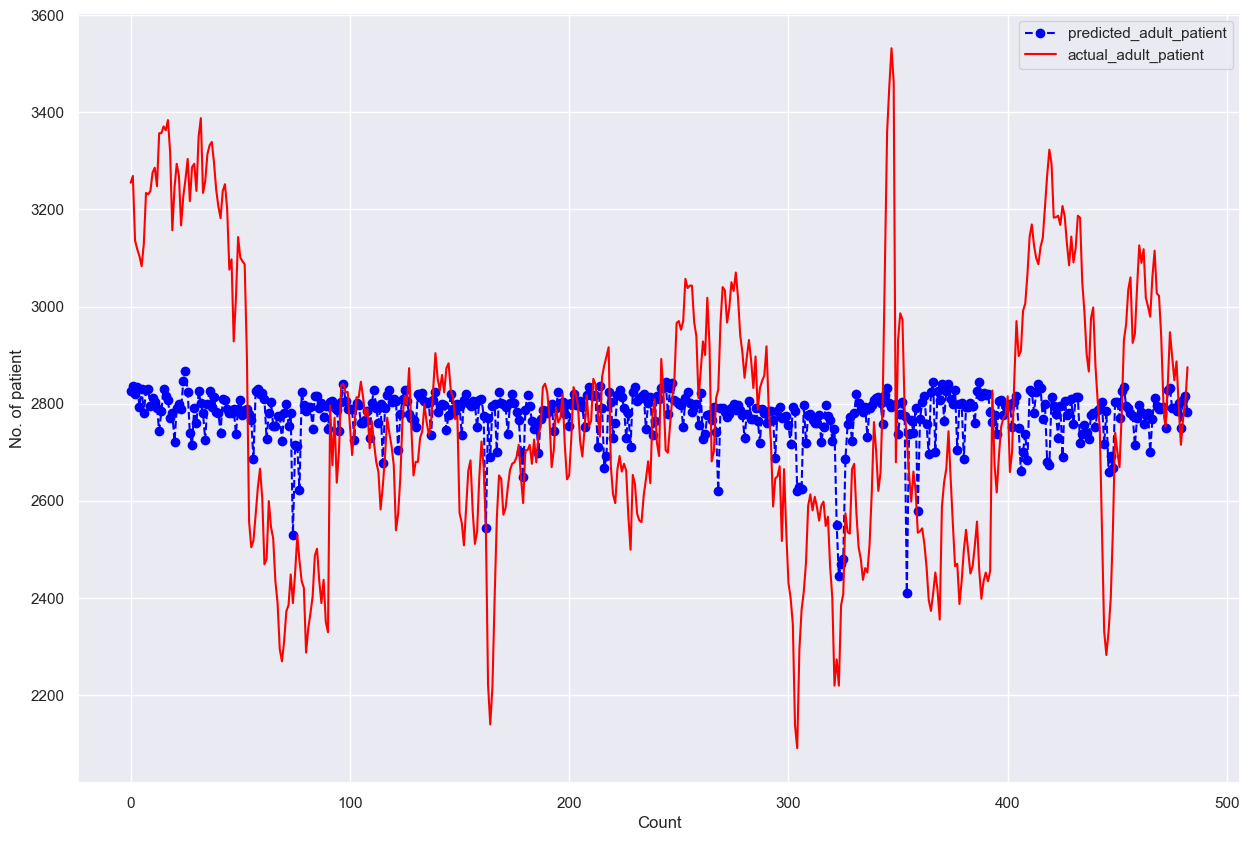

In [18]:
df_predicted_adult_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_adult.plot(color='red')

plt.legend(['predicted_adult_patient','actual_adult_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [19]:
new_df = pd.DataFrame()
new_df['actual_adult_patient'] = list(y_adult)
new_df['predicted_adult_patient'] = predicted_adult_patient
new_df.head()

,actual_adult_patient,predicted_adult_patient
0,3255,2824.993757
1,3269,2836.402341
2,3136,2820.750103
3,3118,2835.002562
4,3104,2793.742505


In [20]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_adult_train,X_train_Sm).fit()
print(ls.summary())

                             OLS Regression Results                            
Dep. Variable:     total adult patient   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     1.983
Date:                 Fri, 05 May 2023   Prob (F-statistic):             0.0475
Time:                         02:39:01   Log-Likelihood:                -2698.5
No. Observations:                  386   AIC:                             5415.
Df Residuals:                      377   BIC:                             5451.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

# The last would be the LASSO of children patient

In [21]:
X_train, X_test, y_children_train, y_children_test = train_test_split(X, y_children, test_size=0.2, random_state=101)

In [22]:
list_X = X.columns

scaler = StandardScaler().fit(X_train[list_X]) 

X_train[list_X] = scaler.transform(X_train[list_X])

X_test[list_X] = scaler.transform(X_test[list_X])

SX=X.copy()
SX[list_X] = scaler.transform(SX[list_X])


LSO_children = Lasso(alpha=0.001).fit(X_train,y_children_train)
#print('Estimated intercept:', LSO_children.intercept_) # <-- Not in use
coeff_parameter = pd.DataFrame(LSO_children.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Minimum Air Temperature,-16.569627
Maximum Air Temperature,2.037890
Relative Humidity (%),8.517094
Rainfall (mm),-5.753688
Weekday,8.686632
Weekend,6.371820
Holiday,0.791523
Day after holiday,2.764086


In [23]:
predicted_trained_children_patient = LSO_children.predict(X_train)
predicted_test_children_patient = LSO_children.predict(X_test)

predicted_children_patient = LSO_children.predict(SX)
df_predicted_children_patient = pd.DataFrame(predicted_children_patient,index=y_children.index,columns = ['predicted_children_patient'])  
df_predicted_children_patient

,predicted_children_patient
0,193.342479
1,205.343808
2,198.183159
3,192.445809
4,203.269472
...,...
478,206.308052
479,199.223587
480,204.958700
481,218.693498


In [24]:
trr= LSO_adult.score(X_train, y_adult_train)
ter= LSO_adult.score(X_test, y_adult_test)

In [25]:
trerror = mean_squared_error(predicted_trained_children_patient, y_children_train)
teerror = mean_squared_error(predicted_test_children_patient, y_children_test)

print('MSE train: %.2f, test: %.2f' % (trerror,teerror))
print('R^2 train: %.2f, test: %.2f' % (trr,ter))




MSE train: 2722.63, test: 2428.88
R^2 train: 0.04, test: 0.09


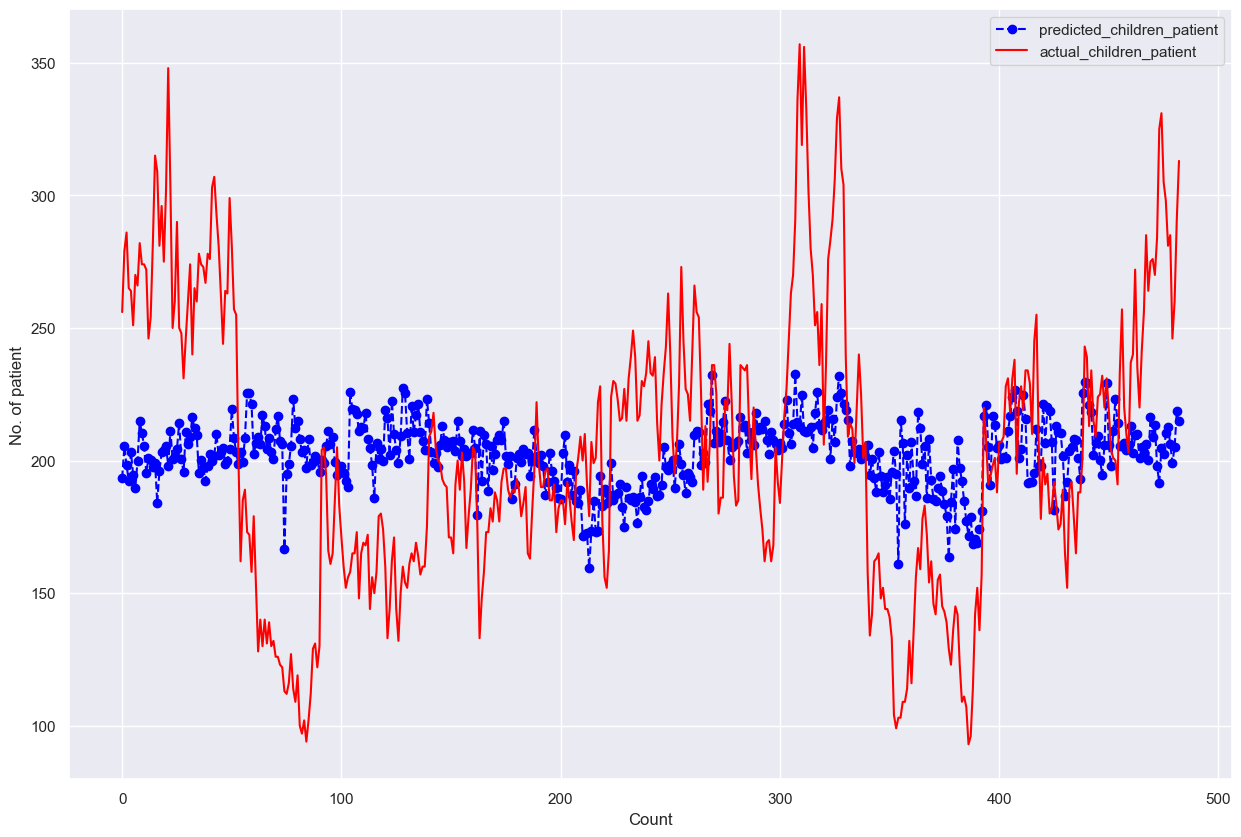

In [26]:
df_predicted_children_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_children.plot(color='red')

plt.legend(['predicted_children_patient','actual_children_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [27]:
new_df = pd.DataFrame()
new_df['actual_children_patient'] = list(y_children)
new_df['predicted_children_patient'] = predicted_children_patient
new_df.head()

,actual_children_patient,predicted_children_patient
0,256,193.342479
1,279,205.343808
2,286,198.183159
3,265,192.445809
4,264,203.269472


In [28]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_children_train,X_train_Sm).fit()
print(ls.summary())

                              OLS Regression Results                              
Dep. Variable:     Total children patient   R-squared:                       0.052
Model:                                OLS   Adj. R-squared:                  0.032
Method:                     Least Squares   F-statistic:                     2.582
Date:                    Fri, 05 May 2023   Prob (F-statistic):            0.00938
Time:                            02:39:13   Log-Likelihood:                -2074.2
No. Observations:                     386   AIC:                             4166.
Df Residuals:                         377   BIC:                             4202.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------